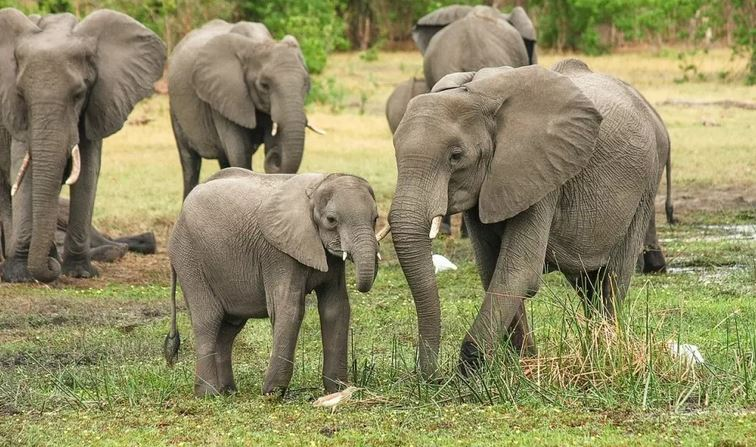

# Problem Set 5: Using Pandas

In this set of exercies, we explore actual elephant tracking data provided my Dr. Amelia Meier (PhD '20). These data, stored in the "`EleTaiOneWeek.csv`" file in the Data folder, include tracking locations for a set of elephants in Gabon. The fields included are described as follows:

| Field | Description | Format |
| --- | --- | --- |
| MovDataID | Name of the elephant | Text |
| CalcID | Numeric ID of the elephant | Text |
| StartDate | Start date/time of the tracking effort | DateTime |
| EndDate | End date/time of the tracking effort | DateTime |
| FixTime | Time that the location was recorded | DateTime |
| X | Tracking longitude | Float |
| Y | Tracking latutude | Float |
| Z | Tracking elevation (not recorded) | Float  |

The steps below lead you through the process of examining these data using Pandas.

### Importing the package

In [ ]:
#Import pandas
import pandas as pd

### 1. Loading and exploring the data
The first step in the analysis is to import the data into our coding environment, ensuring that the data are read as the correct data types. For example, Pandas will interpret the `CalcID` value as an integer, but as it represents a nominal value, we want to import it as a string. 

Once imported successfully, we want to do a quick exploration of the data. Here, this will involve looking at a few records, checking the data types of each column, and then we will examine unique values held in a few fields.

► Q1.1 Import the `EleTaiOneWeek.csv` file (located in the data folder) into a pandas dataframe.
  * Modify the code below so that the `CalcID` field is imported as a string 
  * Note how `parse_dates` imports the `StartDate`,`EndDate`, and `Fixtime` fields as date fields

In [ ]:
#Load the data as instructed
df = pd.read_csv('../data/EleTaiOneWeek.csv',
                 parse_dates=['StartDate','EndDate','Fixtime']
                )

---
► Q1.2 Display the first 5 records in the dataframe

In [ ]:
#Display the "head" (i.e. the first 5 records) of the dataframe
df.

---
► Q1.3 Display the data types of each column

In [ ]:
#Display the data types of each column
df.

---
► Q1.4 List each unique value in the `MovDataID` column

In [ ]:
#List each unique value in the MovDataID column


---
► Q1.5 Reveal how many unique dates are in the `Fixtime` field?

In [ ]:
#Display the number of values in the `Fixtime` column


---
### 2. Subsetting data
Now that we are feeling good that our data were imported correctly, we'll want to wrangle the data in preparation for some analysis. Here we will isolate a few columns into new variables and create a Boolean mask that will allow us to easily subset records linked to one elephant from the data frame of all elephants.  

_Ok, so some of these aren't exactly relevant to our analysis, but rather are for me to see that you can successfully isolate columns and rows..._

► Q2.1 Extract values in the `X` column into a variable called `xCoords`

In [ ]:
#Extract the X values into a series called xCoords
xCoords = 

---
► Q2.2 Display the last 10 values in the `Xcoords` series

In [ ]:
#Display the last 10 values in the series


---
► Q2.3 Create a dataframe of just the `X` and `Y` columns and show the head (first 5 rows) of the dataframe

In [ ]:
#Create a dataframe of just the X and Y columns and show the first 5 rows of data
dfXY = 
dfXY.

---
► Q2.4 Create a Boolean mask (`dfGeorgeMask`) for all records where `MovDataID` is "George"

In [ ]:
#Create Boolean mask where MovDataID has the value "George"
mask_George = 

---
► Q2.5 Select all records where the MovDataID equals "George" into a dataframe called `dfGeorge`
 * *Feel free to use the Boolean mask above or use other techniques.*

In [ ]:
#Create a new dataframe of just records where MovDataID is "George"
dfGeorge = 
dfGeorge.head()

---
### 3. Answering questions with the data
Now that we have command of our imported data sets, we're ready to begin our analysis. In this example, we are going to explore the wanderings of George the elephant. In particular, we want to use the tracking data to see how often George travels near a particular [imaginary] village located at latitude 6.32°N, 7.62°W.  

_**Tip**: Don't forget that longitude values west of prime meridian are negative..._

► Q3.1 If the 'Y' column represents latitude, what's the southern most location George has been seen?

In [ ]:
#Display the southern most location of the "George" subset


---
► Q3.2 Somehow demonstrate that George been seen north of 6.23°N **28** times. (In other words, show how many records meet the criteria...)

---
► Q3.3 How many times has George been seen north of 6.23°N *and* west of 7.62°W?

► Q3.4 What's the *earliest* "Fixtime" date George has been seen 6.23°N and west of -7.62°W?

## A cool plot! 
If we set the index of our table to a time column, then plot the XY coordinates, we can visualize the track of our elephant...

In [ ]:
#Plot the path of George!
dfGeorge.set_index('Fixtime').plot(x='X',y='Y');

See if you can to it with another elephant. You'll have to subset the table for a different individual - we'll choose "Cami" - then repeat the steps above...

In [ ]:
#Plot the path of Cami


---
### 4. Grouping/aggregating data
Now we want to generate some quick movement stats on each individual from our dataset. First, we'll use Panda's `value_counts()` to generate a quick list of how many times each individual has been tracked. Then we'll use Panda's `groupby` function to create a grouped object from which we can easily generate aggeregate statistics like the mean X and Y coordinates taken from all records for a given individual. 

► Q4.1 Use the `value_counts()` function to list how many records exist for each elephant.  

► Q4.2 Group the dataframe of all elephants on the `MovDataID` attribute into a "groupBy" object called `grpName`.

In [ ]:
grpName = 

► Q4.3 Apply the appropriate aggregate function to the `grpName` object to report the median X and Y coordinate for each elephant.   
_Partial credit will be given if include more than just the X and Y columns..._

In [ ]:
#Report the mean X and Y values for each elephant using the grpName object created above


### Demonstrations: Transforming/pivoting data 
_►This portion is ungraded◄_   
We may also want to transform our data. Below are some examples of how that is done using Pandas.

In this example, we first want to examine how many tracking records occur across the hours of the day. To do this, we first need to create a new column listing just the hour from the `Fixtime` timestamp. Pandas has a function to do this: `.dt.hour`.

In [ ]:
#Add an "hour" column to the data 
df['Hour'] = df['Fixtime'].dt.hour
#Have a look at the result
df.head()

With the hour field created, we can compute how may tracks were recorded at each hour (using `value_counts()`) and then plot these as a line plot. For this to work, we need to sort our value_counts result on the index, which is the hour recorded. 

→ _Are there any trends in when elephants have been tracked?_  
→ _It's quite easy to repeat this analysis displaying track records across years. Could you do that?_

In [ ]:
#Plot the number of tracks recorded each out
(df['Hour']       # Extract just the hour records
  .value_counts() # Tally how many records of each hour
  .sort_index()   # Sort on the index (i.e. the hour)
  .plot()         # Create and display a line plot
);

Now we are going to move on to something a bit more sophisticated: we are going to add a new field to our tracking data frame that represents the distance each record is from a given location. 

To do this, we first are going to create a **Python function** that computes the distance a supplied X and Y values is from a provided coordinate tuple. (_This doesn't work accurately with geographic coordinates, but we'll use it anyway..._)

In [ ]:
#Create a function that calculates the distance from a coordinate
def get_dist(theX, theY, thePoint):
    #Extract the coordinates from the provided point into separate variables
    center_x, center_y = thePoint
    #Get distances along X and Y axes
    x_dist = theX - center_x
    y_dist = theY - center_y
    #Compute the distances between points
    the_dist = (x_dist ** 2 + y_dist ** 2) * 0.5
    #Return the distance
    return the_dist

Next we need a point (just a tuple of X and Y coordinates) from which to measure distances. We'll use the centroid of our data (mean X and Y values).

In [ ]:
#Get the centroid of all track records
the_centroid = (df['X'].mean(),df['Y'].mean())
the_centroid

And here is the syntax for applying our `get_dist()` function to the X and Y series in our dataframe to compute each record's distance from `the_centroid`. 

In [ ]:
#Apply the function above to add a distance column
df['distance'] = get_dist(df['X'],df['Y'],the_centroid)
#Have a look
df.head()

Next we want to transform our data so that, for each hour of the day, we show the median distance each animal was recorded away from the overall centroid. 

To do this we want to transform or "pivot" our data such that:
* Each each unique`MovDataID` value becomes a row
* Each unique `Hour` value becomes a column
* The table shows mean distance values for each combination of elephant/hour of day

We'll do this and then add some styling such that dark blue values indicate animals furthest from the centroid.

In [ ]:
#Pivot data
df.pivot_table(
    index='MovDataID', # <- The index becomes the row name
    columns='Hour',    # <- Each unique value in the Hour column become a new separate column
    values=['distance'],      # <- The value assigned to each species/hour combination is taken from the "X" column
    aggfunc='mean'   # <- If more than one species/hour value exists, we will insert the median value
              ).style.background_gradient(cmap = 'YlGnBu') #Style the output

In [ ]:
#Or, using the untransformed data, we can plot
df.hist(column='distance',by='MovDataID',figsize=(15,15));